## Features Comparison Notebook

---

### Objective:

- To assess the impact of different features on the performance of the model.
- To determine the optimal features for the model.

### Methodology:

- A model (RF, SVM, LR) is trained with different features (Chroma, MFCC_30, MFCC_120, CQT_30, CQT_70). The features are used 'as extracted' without any additional processing.
- The model is trained with 80% of the data and tested with the remaining 20%.

#### Findings:

-


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tqdm.notebook as tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
import seaborn as sns

sns.set_theme(context="paper", font_scale=1)

In [2]:
# set the paths
BASE_DIR = "../../dataset/"
LABELS = BASE_DIR + "labels.csv"

# features
FEATURES_BASE = "../../features/"
FEATURES = FEATURES_BASE + "raw/"

# Models
MODELS = "../../models/"
MODELS_RESULTS = MODELS + "results/"

# report
PAPER = "../../paper/"
IMAGES_PATH = PAPER + "images/"

# HYERPARAMETERS
SEED = 42
INTERVAL = 1

In [ ]:
SEED = 42
full_data_dict_keys = ["artifacts", "extrahls", "murmurs", "normals", "extrastoles"]
interval = INTERVAL
sample_rates = ["mix", 4000]
num_feats = [
    "30mfcc",
    "60mfcc",
    "90mfcc",
    "120mfcc",
    "12chroma",
    "20cqt",
    "30cqt",
    "40cqt",
    "60cqt",
    "70cqt",
]
result_df = pd.DataFrame(
    columns=num_feats, index=["Random Forest", "SVM", "Logistic Regression"]
)

for i, num_feat in enumerate(num_feats):
    print(f"Processing 4000hz_{num_feat}\n")

    # define the features name and load the data
    FEATURES_NAME = f"full_data_{interval}s_4000hz_{num_feat}.npy"
    full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()

    # extract the data from the dict
    data_list = []
    for key in full_data_dict_keys:
        X = full_data[key]["X"]
        y = full_data[key]["y"]
        data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        data_list.append(data)
    full_data_array = np.concatenate(data_list, axis=0)

    # split the data into train and test
    X = full_data_array[:, :-1]
    y = full_data_array[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    print("Training random forest\n")
    # train the RF model
    clf = RandomForestClassifier(random_state=SEED)
    clf.fit(X_train, y_train)
    # evaluate the model
    score = clf.score(X_test, y_test)
    # store the results
    result_df.loc["Random Forest",num_feat] = score

    print("Training SVM\n")
    # train the SVM
    clf = SVC(random_state=SEED)
    clf.fit(X_train, y_train)
    # evaluate the model
    score = clf.score(X_test, y_test)
    result_df.loc["SVM",num_feat] = score

    # store the results

    print("Training logistic regression\n")
    # train the LR
    clf = LogisticRegression(random_state=SEED, max_iter=300)
    clf.fit(X_train, y_train)
    # evaluate the model
    score = clf.score(X_test, y_test)
    # store the results
    result_df.loc["Logistic Regression",num_feat] = score



# save the results
result_df.to_csv(MODELS_RESULTS + f"results.csv")
result_df

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '30mfcc'),
  Text(0, 1.5, '60mfcc'),
  Text(0, 2.5, '90mfcc'),
  Text(0, 3.5, '120mfcc'),
  Text(0, 4.5, '12chroma'),
  Text(0, 5.5, '20cqt'),
  Text(0, 6.5, '30cqt'),
  Text(0, 7.5, '40cqt'),
  Text(0, 8.5, '60cqt'),
  Text(0, 9.5, '70cqt')])

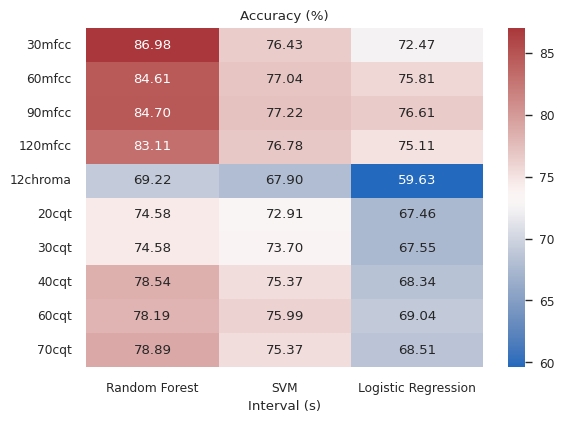

In [8]:
result_df = pd.read_csv(MODELS_RESULTS + "results.csv", index_col=0).transpose()

sns.heatmap(result_df.astype(float) * 100, annot=True, cmap="vlag", fmt=".2f")
plt.title("Accuracy (%)")
plt.xlabel("Interval (s)")
plt.yticks(rotation=0)